In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [8]:
X, _ = make_blobs(n_samples=50, centers=2, cluster_std=1.4)

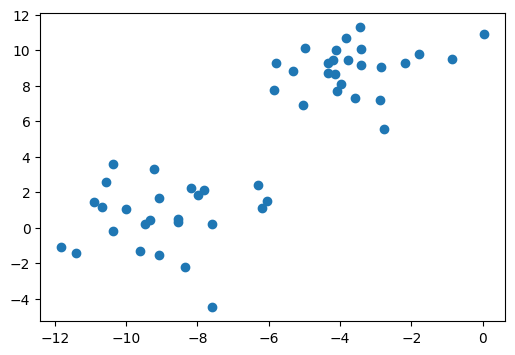

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [10]:
X

array([[ -4.97666654,  10.13209775],
       [ -3.83586205,  10.72077473],
       [ -5.04063734,   6.90237884],
       [ -7.81766816,   2.14241564],
       [ -7.60019625,   0.20465134],
       [ -4.32487006,   8.70666056],
       [  0.03789101,  10.91532331],
       [ -7.97595702,   1.83672296],
       [ -9.08068299,   1.6475999 ],
       [ -8.35042155,  -2.22594262],
       [ -2.86106297,   9.04104708],
       [ -2.76261276,   5.55105116],
       [ -3.77392225,   9.43403238],
       [ -3.40068164,  10.06654703],
       [ -6.0465771 ,   1.52527768],
       [ -2.87033673,   7.2063407 ],
       [ -3.43348512,  11.30258069],
       [ -8.55121614,   0.47193846],
       [ -9.9915068 ,   1.07024313],
       [ -5.33065473,   8.84676638],
       [ -4.33881022,   9.31411127],
       [ -4.141889  ,   8.64593289],
       [ -9.32140308,   0.44207729],
       [ -4.11662853,  10.04188325],
       [-10.56331337,   2.56055167],
       [ -3.96900039,   8.09674261],
       [-11.4051542 ,  -1.44676597],
 

In [11]:
linkage_matrix= linkage(X, method="ward")

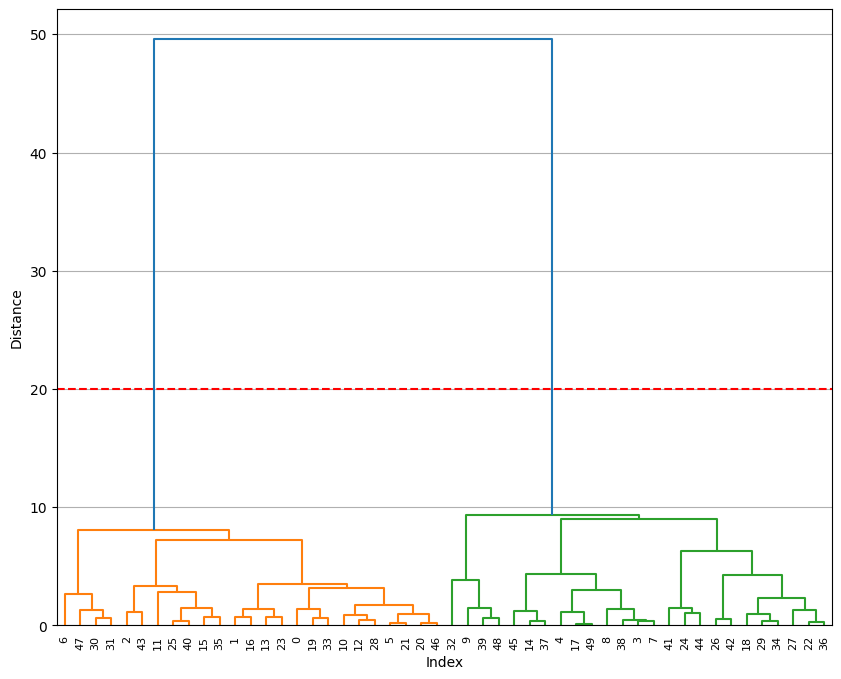

In [15]:
plt.figure(figsize=(10,8))
dendrogram(linkage_matrix)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.grid(axis="y")
plt.axhline(20, ls="--", color="red")
plt.show()

In [16]:
model= AgglomerativeClustering(n_clusters=2)

In [17]:
pred=model.fit_predict(X)

In [18]:
pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0])

In [19]:
_

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0])

In [20]:
np.allclose(pred,_)

True

In [23]:
silhouette_score(X, pred)

np.float64(0.7216421329469174)

In [25]:
wine= load_wine()

In [26]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [27]:
df= pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"]= wine.target

In [28]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


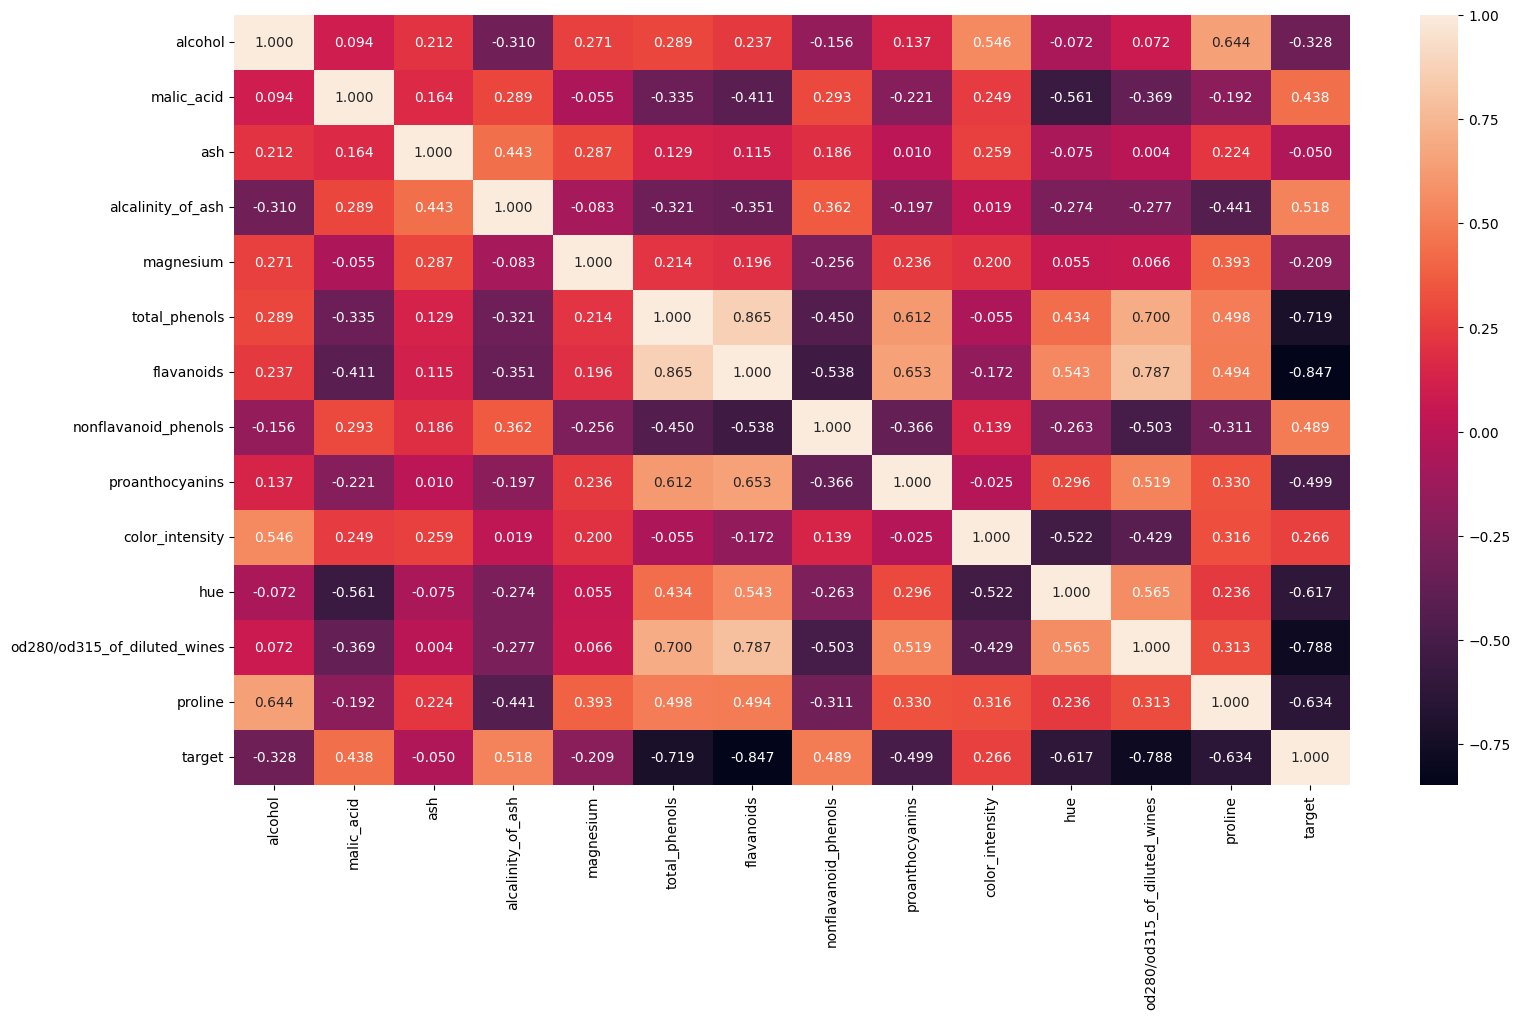

In [33]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

In [34]:
wine_linkage= linkage(df.drop("target", axis=1), method="ward")

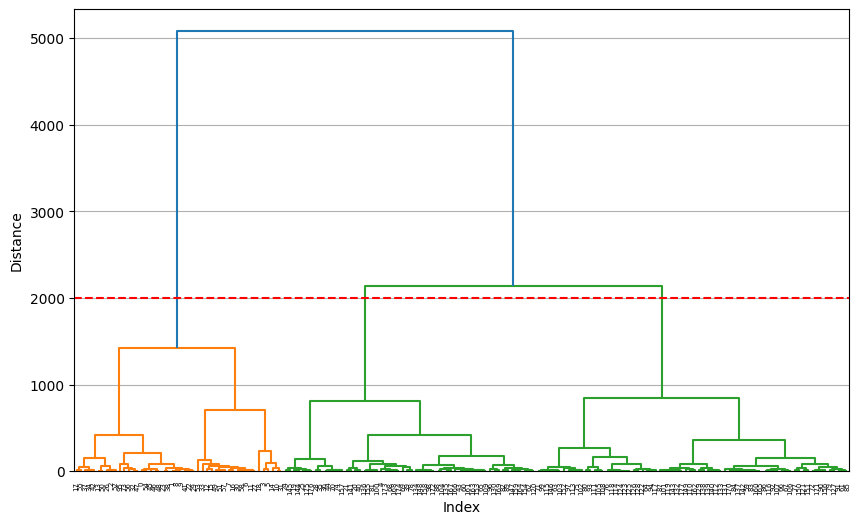

In [40]:
plt.figure(figsize=(10,6))
dendrogram(wine_linkage)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.grid(axis="y")
plt.axhline(2000, ls="--", color="red")
plt.show()

In [41]:
wine_groups= AgglomerativeClustering(n_clusters=3)

In [42]:
clusters= wine_groups.fit_predict(df.drop("target", axis=1))

In [43]:
silhouette_score(df.drop("target", axis=1), clusters)

np.float64(0.5644796401732068)